<a href="https://colab.research.google.com/github/jaaaamj0711/TIL/blob/main/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


data = pd.read_csv("/content/drive/MyDrive/sample_train.csv")
train = pd.read_csv("/content/drive/MyDrive/kaggle/train (1).csv")
test = pd.read_csv("/content/drive/MyDrive/kaggle/test (1).csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    int64  
 5   id            120 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 5.8 KB


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.6,3.6,1.0,0.2,0
1,6.2,2.2,4.5,1.5,1
2,5.5,2.5,4.0,1.3,1
3,6.9,3.2,5.7,2.3,2
4,5.4,3.4,1.5,0.4,0


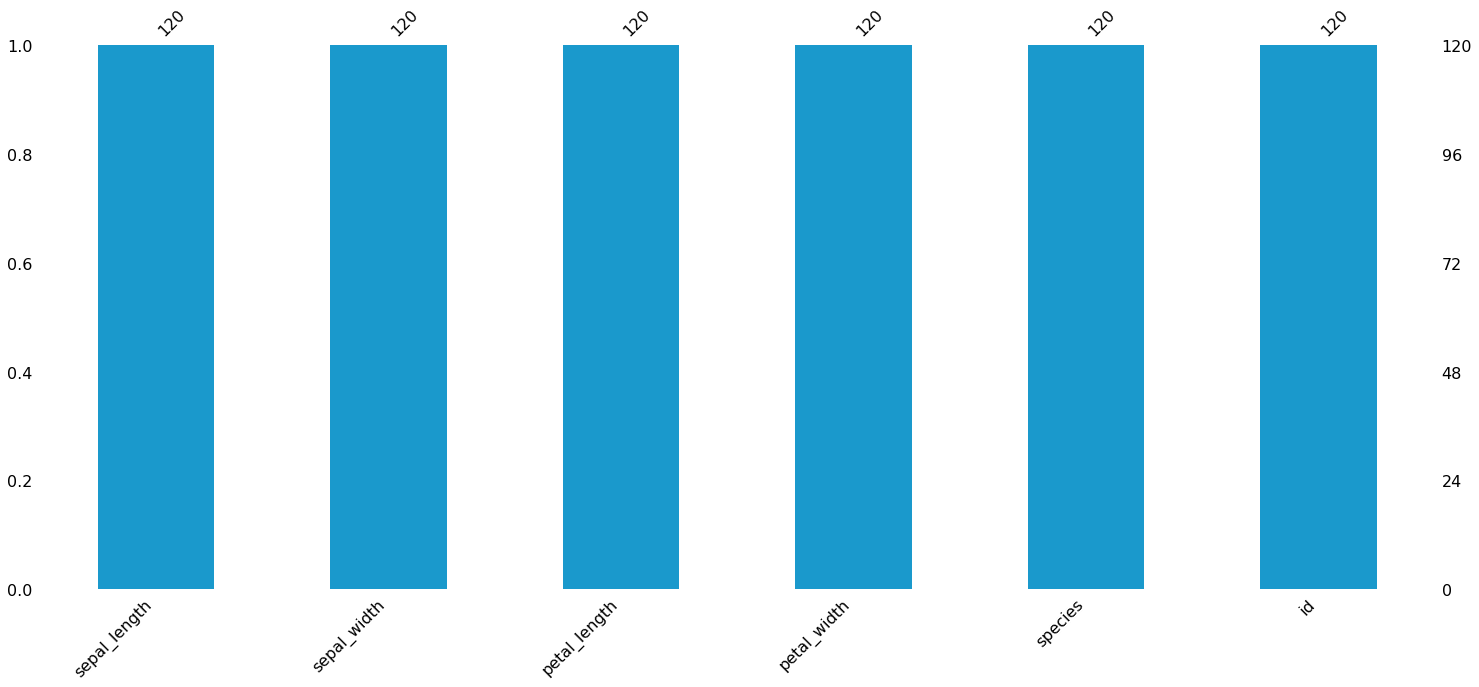

In [ ]:
# 결측치 확인
import missingno as msno
msno.bar(df=data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [ ]:
data = data.drop(columns="id")

In [ ]:
# 기초통계량 확인
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,120.000000,120.000000,120.000000,120.000000,120.00000
mean,5.839167,3.050833,3.780000,1.205833,1.00000
std,0.837693,0.430360,1.775302,0.766449,0.81992
min,4.300000,2.000000,1.000000,0.100000,0.00000
25%,5.100000,2.800000,1.575000,0.300000,0.00000
50%,5.750000,3.000000,4.350000,1.300000,1.00000
75%,6.400000,3.400000,5.100000,1.800000,2.00000
max,7.900000,4.400000,6.900000,2.500000,2.00000


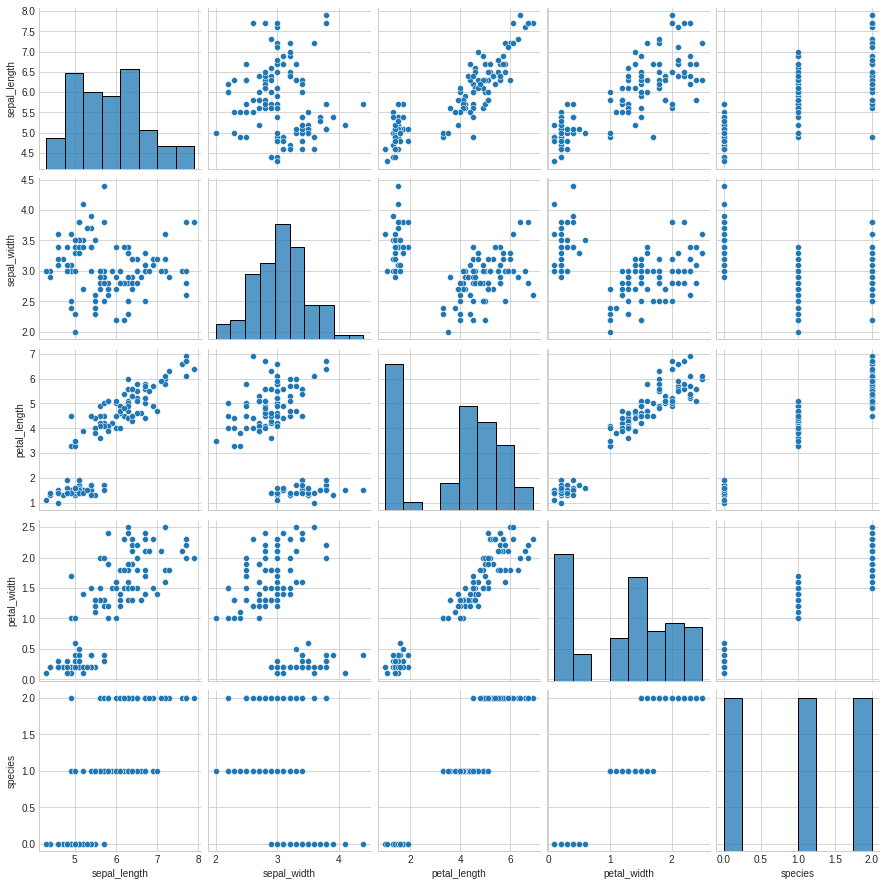

In [ ]:
sns.pairplot(data)

## 분류 연습

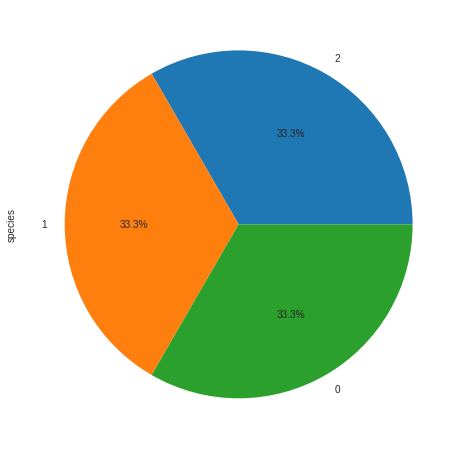

In [ ]:
plt.figure(figsize=(8, 8))

data['species'].value_counts().plot.pie(autopct='%1.1f%%')

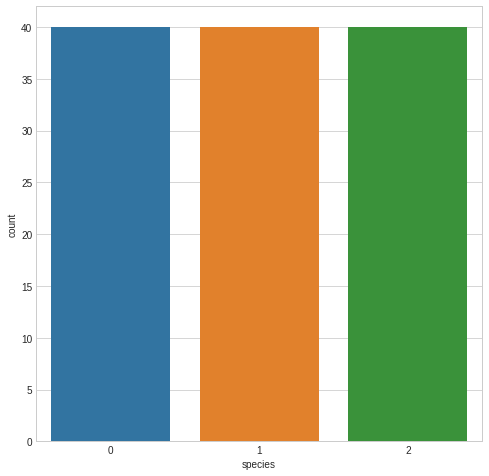

In [ ]:
plt.figure(figsize=(8, 8))

sns.countplot(x = data.species)

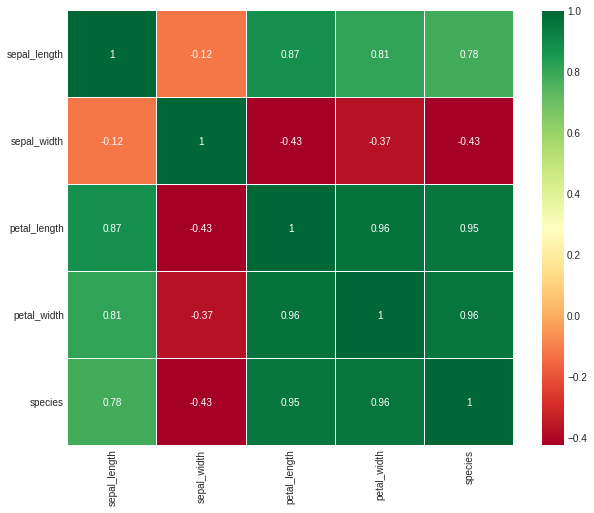

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['species'])

train_X=train[train.columns[0:4]]
train_Y=train[train.columns[4:]]
test_X=test[test.columns[0:4]]
test_Y=test[test.columns[4]]
X=data[data.columns[0:4]]
Y=data['species']

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
predict_logist=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predict_logist,test_Y))

The accuracy of the Logistic Regression is 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
predict_nb=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(predict_nb,test_Y))

The accuracy of the NaiveBayes is 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction_rf=model.predict(test_X)
print('The accuracy of the Random Forest is',metrics.accuracy_score(prediction_rf,test_Y))

The accuracy of the Random Forest is 0.9722222222222222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
model=XGBClassifier()
model.fit(train_X,train_Y)
predict_xgboost=model.predict(test_X)
print('The accuracy of the Xgboost is',metrics.accuracy_score(predict_xgboost,test_Y))

The accuracy of the Xgboost is 0.9722222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 


kfold = KFold(n_splits=10, random_state=22) 


xyz=[]
accuracy=[]
std=[]

classifiers=['Logistic Regression','Naive Bayes','Random Forest', 'Xgboost']

models=[LogisticRegression(),GaussianNB(),RandomForestClassifier(n_estimators=100), XGBClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold ,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
model_df=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
model_df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,CV Mean,Std
Logistic Regression,0.958333,0.067185
Naive Bayes,0.958333,0.055902
Random Forest,0.950000,0.066667
Xgboost,0.950000,0.066667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


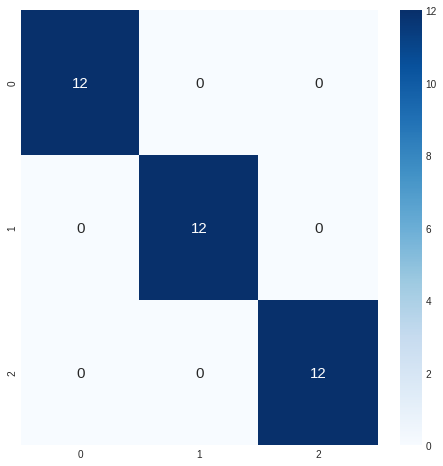

In [ ]:
plt.figure(figsize=(8, 8))
model = LogisticRegression()
model.fit(train_X,train_Y)
y_pred=model.predict(test_X)
sns.heatmap(confusion_matrix(test_Y,y_pred),annot=True, cmap='Blues', annot_kws={'size':15})

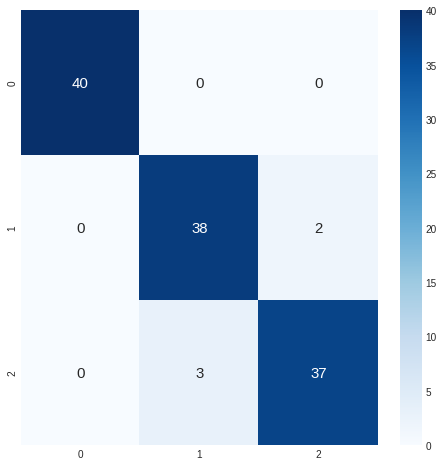

In [ ]:
plt.figure(figsize=(8, 8))
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True, cmap='Blues', annot_kws={'size':15})

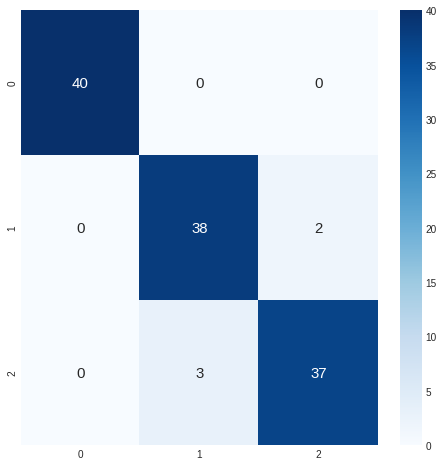

In [ ]:
plt.figure(figsize=(8, 8))
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True, cmap='Blues', annot_kws={'size':15})

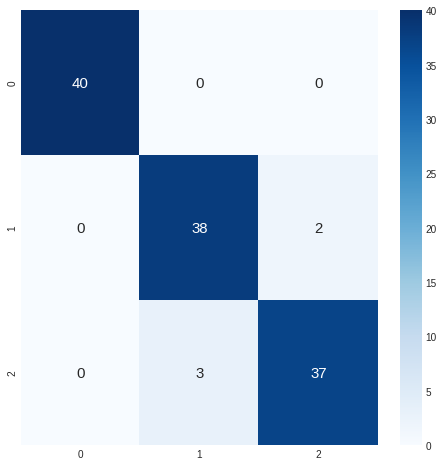

In [ ]:
plt.figure(figsize=(8, 8))
y_pred = cross_val_predict(XGBClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True, cmap='Blues', annot_kws={'size':15})